# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


# Loading Dataset

In [2]:
df = pd.read_csv('data/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Eploratory Data Analysis

In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df['votes'].nunique()

2328

In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df = df[['name','online_order', 'book_table', 'rate', 'votes',
      'location', 'rest_type', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']]

In [9]:
columns = df.columns
for col in columns: 
    print(df[col].isna().value_counts())
    print('-'*50)

name
False    51717
Name: count, dtype: int64
--------------------------------------------------
online_order
False    51717
Name: count, dtype: int64
--------------------------------------------------
book_table
False    51717
Name: count, dtype: int64
--------------------------------------------------
rate
False    43942
True      7775
Name: count, dtype: int64
--------------------------------------------------
votes
False    51717
Name: count, dtype: int64
--------------------------------------------------
location
False    51696
True        21
Name: count, dtype: int64
--------------------------------------------------
rest_type
False    51490
True       227
Name: count, dtype: int64
--------------------------------------------------
approx_cost(for two people)
False    51371
True       346
Name: count, dtype: int64
--------------------------------------------------
listed_in(type)
False    51717
Name: count, dtype: int64
--------------------------------------------------
listed_in

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [11]:
df[df.duplicated()].shape

(110, 10)

In [12]:
df[df['name']=='My Tea House']

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
23,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe",600,Cafes,Banashankari
268,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe",600,Delivery,Banashankari
553,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,500,Dine-out,Banashankari
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,500,Dine-out,Banashankari
2826,My Tea House,Yes,No,3.6/5,62,Banashankari,"Quick Bites, Cafe",600,Delivery,Basavanagudi
4196,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,500,Delivery,Bellandur
9085,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,500,Delivery,BTM
16812,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,800,Delivery,HSR
17399,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,800,Dine-out,HSR
27246,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,800,Delivery,Koramangala 4th Block


In [13]:
df = df.drop_duplicates()

In [14]:
df

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars,Whitefield


In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df['rate'].fillna(0, inplace=True)
df['rate'] = df['rate'].str.replace('NEW','0', regex=False)
df['rate'] = df['rate'].str.replace('-','0', regex=False)
df['rating'] = df['rate'].str.extract(r'(\d+\.?\d*)').astype(float)
df['rating'].fillna(0, inplace = True)

In [17]:
df['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [18]:
df

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),rating
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet,Banashankari,3.7
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,"1,500",Pubs and bars,Whitefield,3.6
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,600,Pubs and bars,Whitefield,0.0
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,"2,000",Pubs and bars,Whitefield,0.0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars,Whitefield,4.3


In [19]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [20]:
df[df['location'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),rating
1662,Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,Delivery,Bannerghatta Road,0.0
9874,Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,Delivery,BTM,0.0
13693,Mohabbat Desi Restaurant,No,No,NaN,0,NaN,NaN,NaN,Delivery,Electronic City,0.0
16351,Desi Chatkara,No,No,NaN,0,NaN,NaN,NaN,Delivery,HSR,0.0
26432,New Taj Biryani Centre,No,No,NaN,0,NaN,NaN,NaN,Dine-out,Kammanahalli,0.0
26519,AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,Buffet,Koramangala 4th Block,0.0
27672,Manchow,No,No,NaN,0,NaN,NaN,NaN,Delivery,Koramangala 4th Block,0.0
28611,Manchow,No,No,NaN,0,NaN,NaN,NaN,Dine-out,Koramangala 4th Block,0.0
29298,AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,Buffet,Koramangala 5th Block,0.0
30604,Manchow,No,No,NaN,0,NaN,NaN,NaN,Delivery,Koramangala 5th Block,0.0


In [21]:
df.dropna(subset='location', inplace =True)

In [22]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [23]:
df[df['rest_type'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),rating
999,Mughlai Kitchen,Yes,No,3.5/5,269,BTM,NaN,600,Delivery,Bannerghatta Road,3.5
1300,Eat & Joy Restaurant,Yes,No,3.0/5,7,JP Nagar,NaN,300,Delivery,Bannerghatta Road,3.0
1376,Kababish Restaurant,Yes,No,3.6/5,15,BTM,NaN,700,Delivery,Bannerghatta Road,3.6
1565,Goli Vada Pav No 1,No,No,NaN,0,Bannerghatta Road,NaN,150,Delivery,Bannerghatta Road,0.0
1637,Ammi's Biryani,No,No,2.4/5,392,Bannerghatta Road,NaN,500,Delivery,Bannerghatta Road,2.4
...,...,...,...,...,...,...,...,...,...,...,...
50978,Snack Itt,No,No,NaN,0,Whitefield,NaN,200,Desserts,Whitefield,0.0
51130,Pindi Bangalore,Yes,No,NaN,0,Whitefield,NaN,900,Dine-out,Whitefield,0.0
51195,Special Biryani House,Yes,No,3.2 /5,202,Whitefield,NaN,400,Dine-out,Whitefield,3.2
51294,Red Roost,No,No,NaN,0,Whitefield,NaN,500,Dine-out,Whitefield,0.0


In [24]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
df[df['approx_cost(for two people)'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),rating
1768,Innate,No,No,NaN,0,JP Nagar,Delivery,NaN,Delivery,Bannerghatta Road,0.0
1795,Super Chef's (New Royal treat),No,No,NaN,0,Bannerghatta Road,Quick Bites,NaN,Delivery,Bannerghatta Road,0.0
3069,Super Chef's (New Royal treat),No,No,0,0,Bannerghatta Road,Quick Bites,NaN,Delivery,Basavanagudi,0.0
3774,The Hub - Ibis Bengaluru,No,No,3.9/5,237,Marathahalli,Bar,NaN,Buffet,Bellandur,3.9
3954,North Indian Kitchen,No,No,3.2/5,13,HSR,Takeaway,NaN,Delivery,Bellandur,3.2
...,...,...,...,...,...,...,...,...,...,...,...
50940,Cinnabon,No,No,4.0 /5,80,Whitefield,Quick Bites,NaN,Desserts,Whitefield,4.0
51233,Mayas kitchen,No,No,NaN,0,Whitefield,Casual Dining,NaN,Dine-out,Whitefield,0.0
51247,Mast Kalandar,No,No,2.6 /5,76,Whitefield,Casual Dining,NaN,Dine-out,Whitefield,2.6
51271,Karavalli Food Court,No,No,3.2 /5,4,Whitefield,Casual Dining,NaN,Dine-out,Whitefield,3.2


In [26]:
df['approx_cost(for two people)'].fillna(0, inplace=True)
df['approx_cost(for two people)'].str.replace(',','')

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51586, dtype: object

In [27]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)', 'rating'],
      dtype='object')

In [28]:
df = df[['name', 'online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)']]

# Final Cleaned Dataset

In [29]:
df

,name,online_order,book_table,rating,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars,Whitefield


# Visualizations

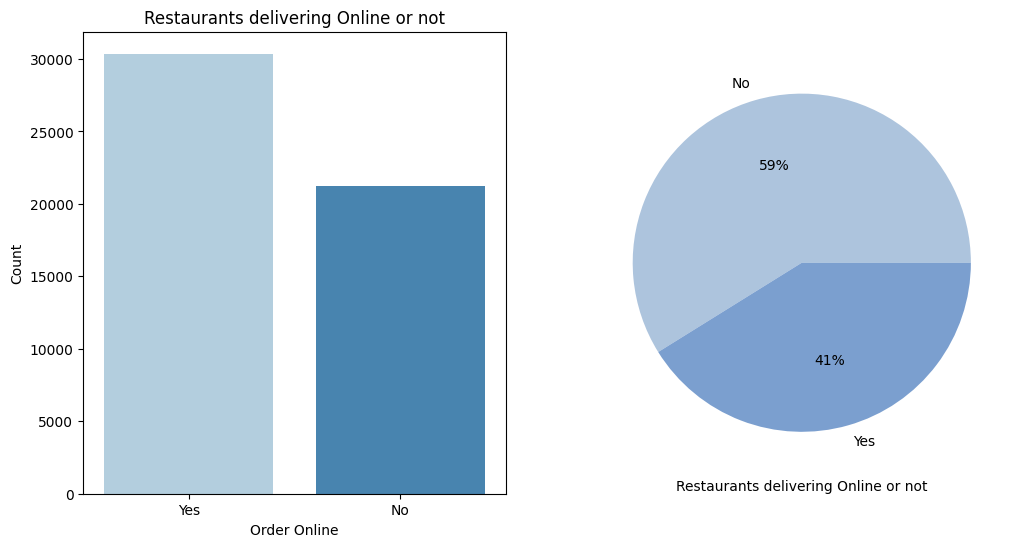

In [30]:

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(data=df, x = 'online_order', palette='Blues')
plt.xlabel('Order Online')
plt.ylabel('Count')
plt.title('Restaurants delivering Online or not')

plt.subplot(1,2,2)
plt.pie(df['online_order'].value_counts(), labels=['No','Yes'], autopct='%2.0f%%', colors=['#adc4dd','#7B9FCF'])

plt.xlabel('Restaurants delivering Online or not')
plt.show()



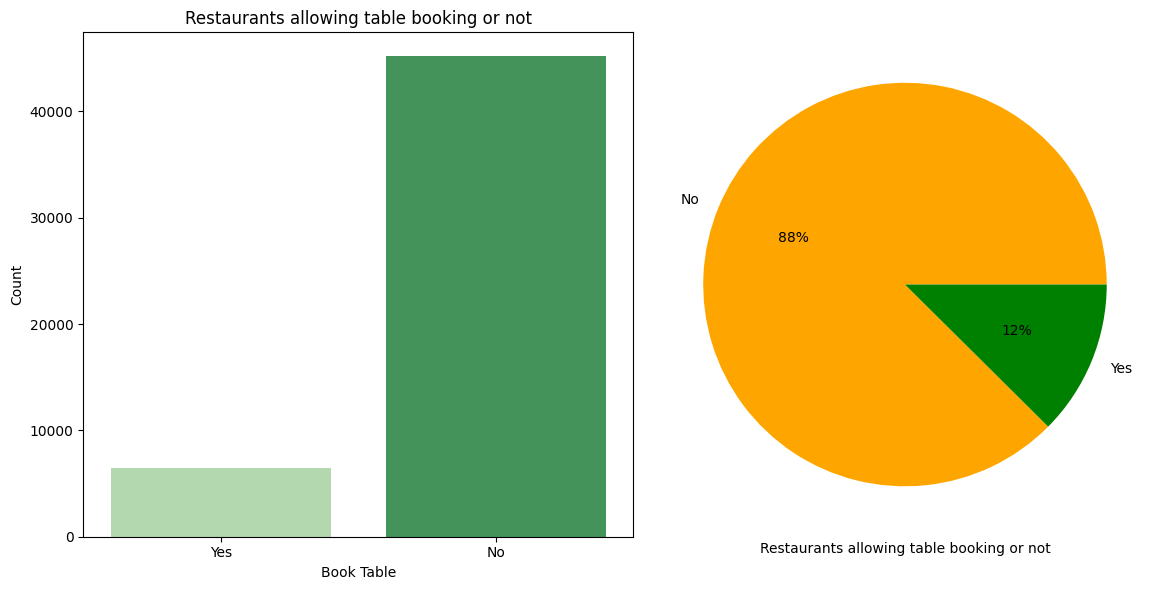

In [31]:

plt.figure(figsize=(12,6))



plt.subplot(1,2,1)
sns.countplot(data=df, x = 'book_table', palette='Greens',)
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.title('Restaurants allowing table booking or not')
plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(df['book_table'].value_counts(), labels=['No','Yes'], autopct='%2.0f%%', colors=['orange','Green'],)
plt.xlabel('Restaurants allowing table booking or not')
plt.tight_layout()

plt.show()



In [32]:
tables_book_yes = df[df['book_table']== 'Yes']
tables_book_no = df[df['book_table']== 'No']

tables_book_no_avg = tables_book_no['rating'].mean() 
tables_book_yes_avg = tables_book_yes['rating'].mean() 
round(tables_book_no_avg,2),round(tables_book_yes_avg,2)

(2.83, 4.05)

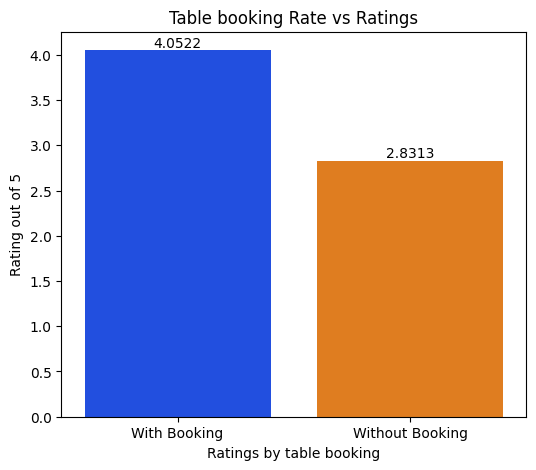

In [33]:
fig , ax = plt.subplots(figsize=(6,5))
values = [tables_book_yes_avg,tables_book_no_avg]
ticks = ['With Booking', 'Without Booking']
sns.barplot(data = values, palette='bright')
ax.set_xticklabels( ticks,rotation=0)

for i in ax.containers:
    ax.bar_label(i)

plt.ylabel('Rating out of 5')
plt.xlabel('Ratings by table booking')
plt.title('Table booking Rate vs Ratings')
plt.show()

We can conclue that booked table has average higher rating

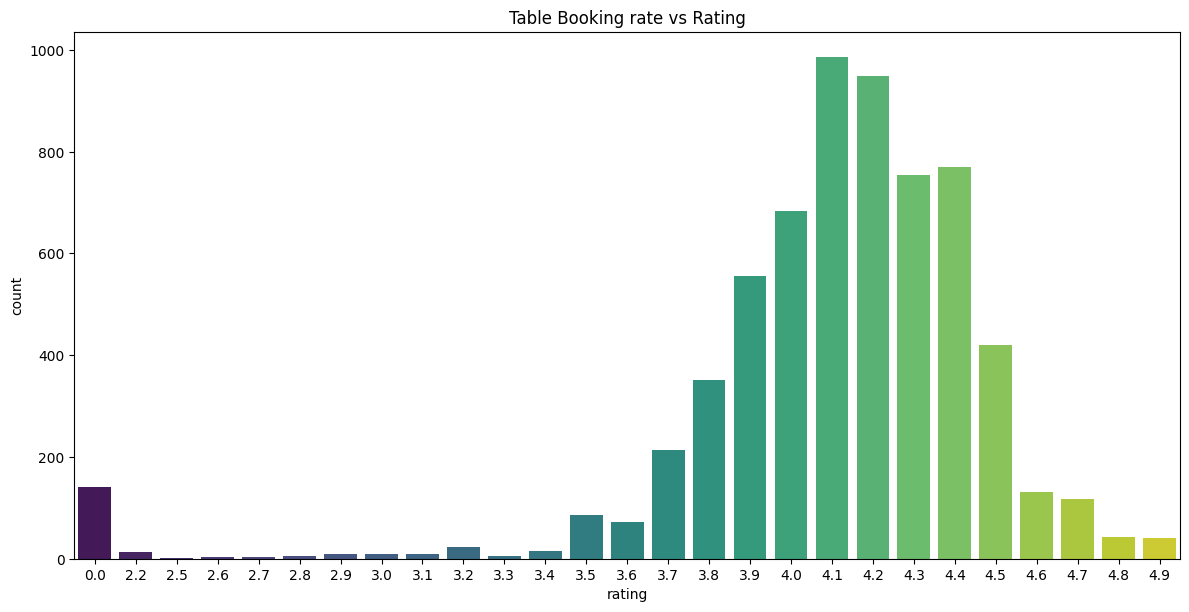

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=tables_book_yes, x ='rating', palette='viridis')
plt.tight_layout()
plt.title('Table Booking rate vs Rating')
plt.show()

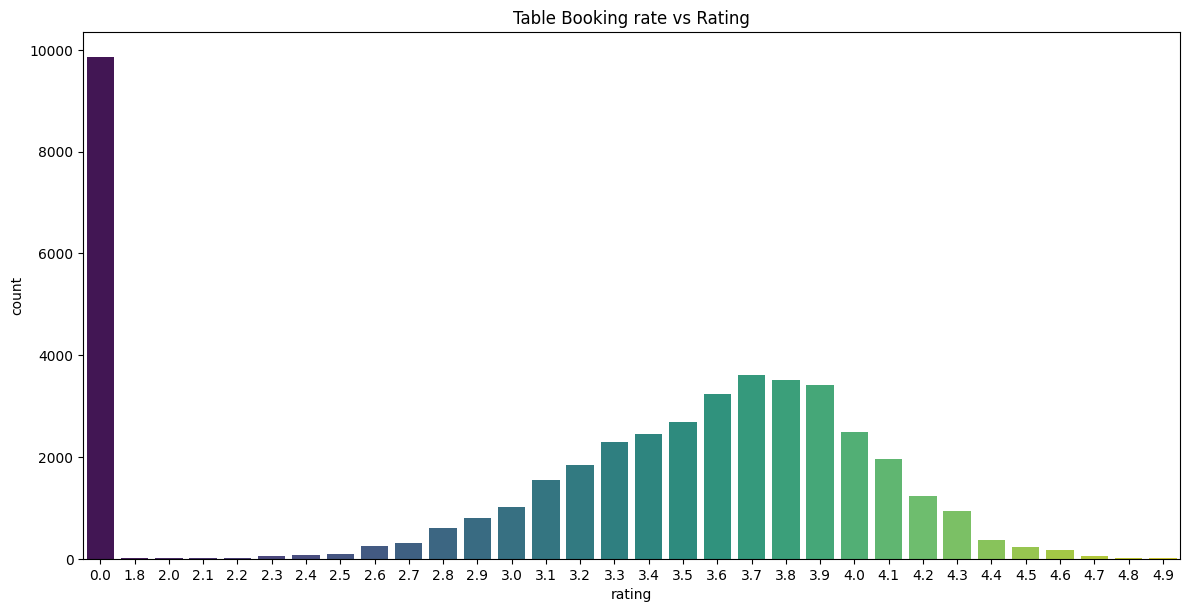

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data=tables_book_no, x ='rating', palette='viridis')
plt.tight_layout()
plt.title('Table Booking rate vs Rating')
plt.show()

In [36]:
# df.groupby('location')[['rating','votes']].mean().sort_values('rating', ascending=False)
top_locations = df.groupby('location')[['rating','votes']].apply(lambda x: x.nlargest(10, columns = 'rating')).droplevel(1).reset_index()

In [37]:
top_locations

,location,rating,votes
0,BTM,4.9,6375
1,BTM,4.9,6375
2,BTM,4.9,6404
3,BTM,4.9,6452
4,BTM,4.9,6404
...,...,...,...
888,Yeshwantpur,4.1,254
889,Yeshwantpur,4.0,89
890,Yeshwantpur,4.0,106
891,Yeshwantpur,4.0,89


## Top 10 Best Locations

In [38]:
top_locations['location'].unique()[:10]

array(['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road',
       'Basavanagudi', 'Basaveshwara Nagar', 'Bellandur', 'Bommanahalli',
       'Brigade Road', 'Brookefield'], dtype=object)

In [39]:
locations = df.groupby('location')[['rating']].median()
locations = pd.DataFrame(locations)
locations['counts'] = df['location'].value_counts()
locations.sort_values(by = ['counts','rating'], ascending = False).head(10)


,rating,counts
location,,
BTM,3.5,5109
HSR,3.6,2521
Koramangala 5th Block,4.0,2502
JP Nagar,3.6,2234
Whitefield,3.4,2140
Indiranagar,3.9,2075
Jayanagar,3.8,1926
Marathahalli,3.4,1843
Bannerghatta Road,3.3,1628


In [43]:
df

,name,online_order,book_table,rating,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars,Whitefield


In [44]:
rest_types = pd.DataFrame(df['rest_type'].value_counts().head(20))
rest_types

,count
rest_type,
Quick Bites,19094
Casual Dining,10309
Cafe,3727
Delivery,2600
Dessert Parlor,2260
"Takeaway, Delivery",2031
"Casual Dining, Bar",1148
Bakery,1140
Beverage Shop,865


## Restaurant Types

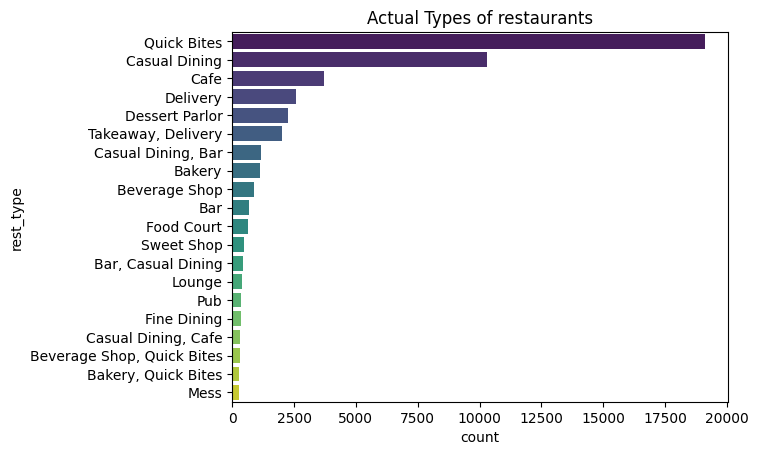

In [70]:
plt.title('Actual Types of restaurants')
sns.barplot(data = rest_types, y = 'rest_type', x = 'count', palette='viridis')
plt.show()

In [46]:
listed_type = df['listed_in(type)'].value_counts()
listed_type = pd.DataFrame(listed_type)
listed_type['rating'] = df.groupby('listed_in(type)')[['rating']].mean()
listed_type

,count,rating
listed_in(type),,
Delivery,25857,2.910608
Dine-out,17750,2.942648
Desserts,3593,2.871918
Cafes,1722,3.431707
Drinks & nightlife,1094,3.845704
Buffet,876,3.877169
Pubs and bars,694,3.696686


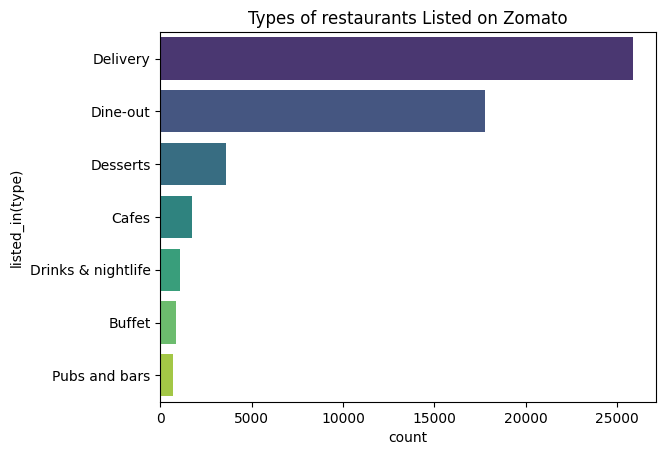

In [69]:
plt.title('Types of restaurants Listed on Zomato')
sns.barplot(data = listed_type , y = 'listed_in(type)', x = 'count', palette='viridis')
plt.show()

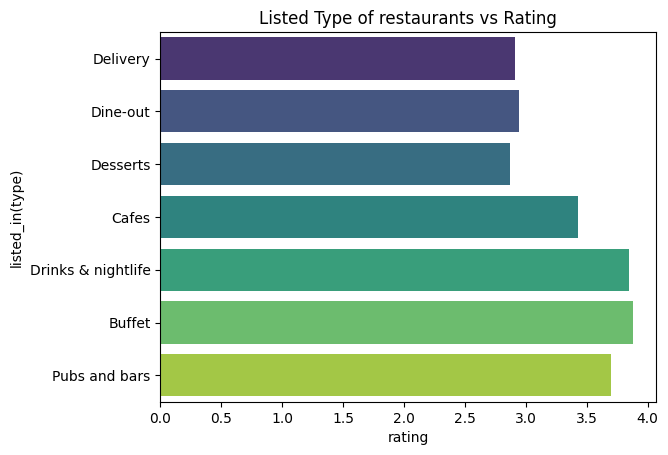

In [67]:
plt.title('Listed Type of restaurants vs Rating')
sns.barplot(data = listed_type , y = 'listed_in(type)', x = 'rating', palette='viridis')
plt.show()

In [49]:
df

,name,online_order,book_table,rating,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars,Whitefield


In [50]:
df['approx_cost(for two people)'].fillna(0, inplace=True)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [51]:
df['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [52]:
cost_of_rest = df.groupby('name')[['approx_cost(for two people)','rating']].mean().sort_values('approx_cost(for two people)',ascending=False).reset_index()
cost_of_rest

,name,approx_cost(for two people),rating
0,Le Cirque Signature - The Leela Palace,6000.0,4.30
1,Royal Afghan - ITC Windsor,5000.0,4.30
2,Malties - Radisson Blu,4500.0,4.30
3,La Brasserie - Le Meridien,4100.0,4.10
4,Grill 99 - The Ritz-Carlton,4000.0,3.44
...,...,...,...
8783,Tadka Singh,NaN,3.40
8784,The Enav Bowl,NaN,3.80
8785,The Hub - Ibis Bengaluru,NaN,3.90
8786,Twist N Roll,NaN,3.40


In [53]:
cost_of_rest = pd.DataFrame(cost_of_rest[cost_of_rest['approx_cost(for two people)']>0].head(10))
cost_of_rest.columns

Index(['name', 'approx_cost(for two people)', 'rating'], dtype='object')

In [54]:
cost_of_rest.describe()

,approx_cost(for two people),rating
count,10.000000,10.000000
mean,4360.000000,4.189833
std,663.659886,0.283164
min,4000.000000,3.440000
25%,4000.000000,4.150000
50%,4000.000000,4.300000
75%,4400.000000,4.300000
max,6000.000000,4.425000


## Top 10 Restaurants by Cost

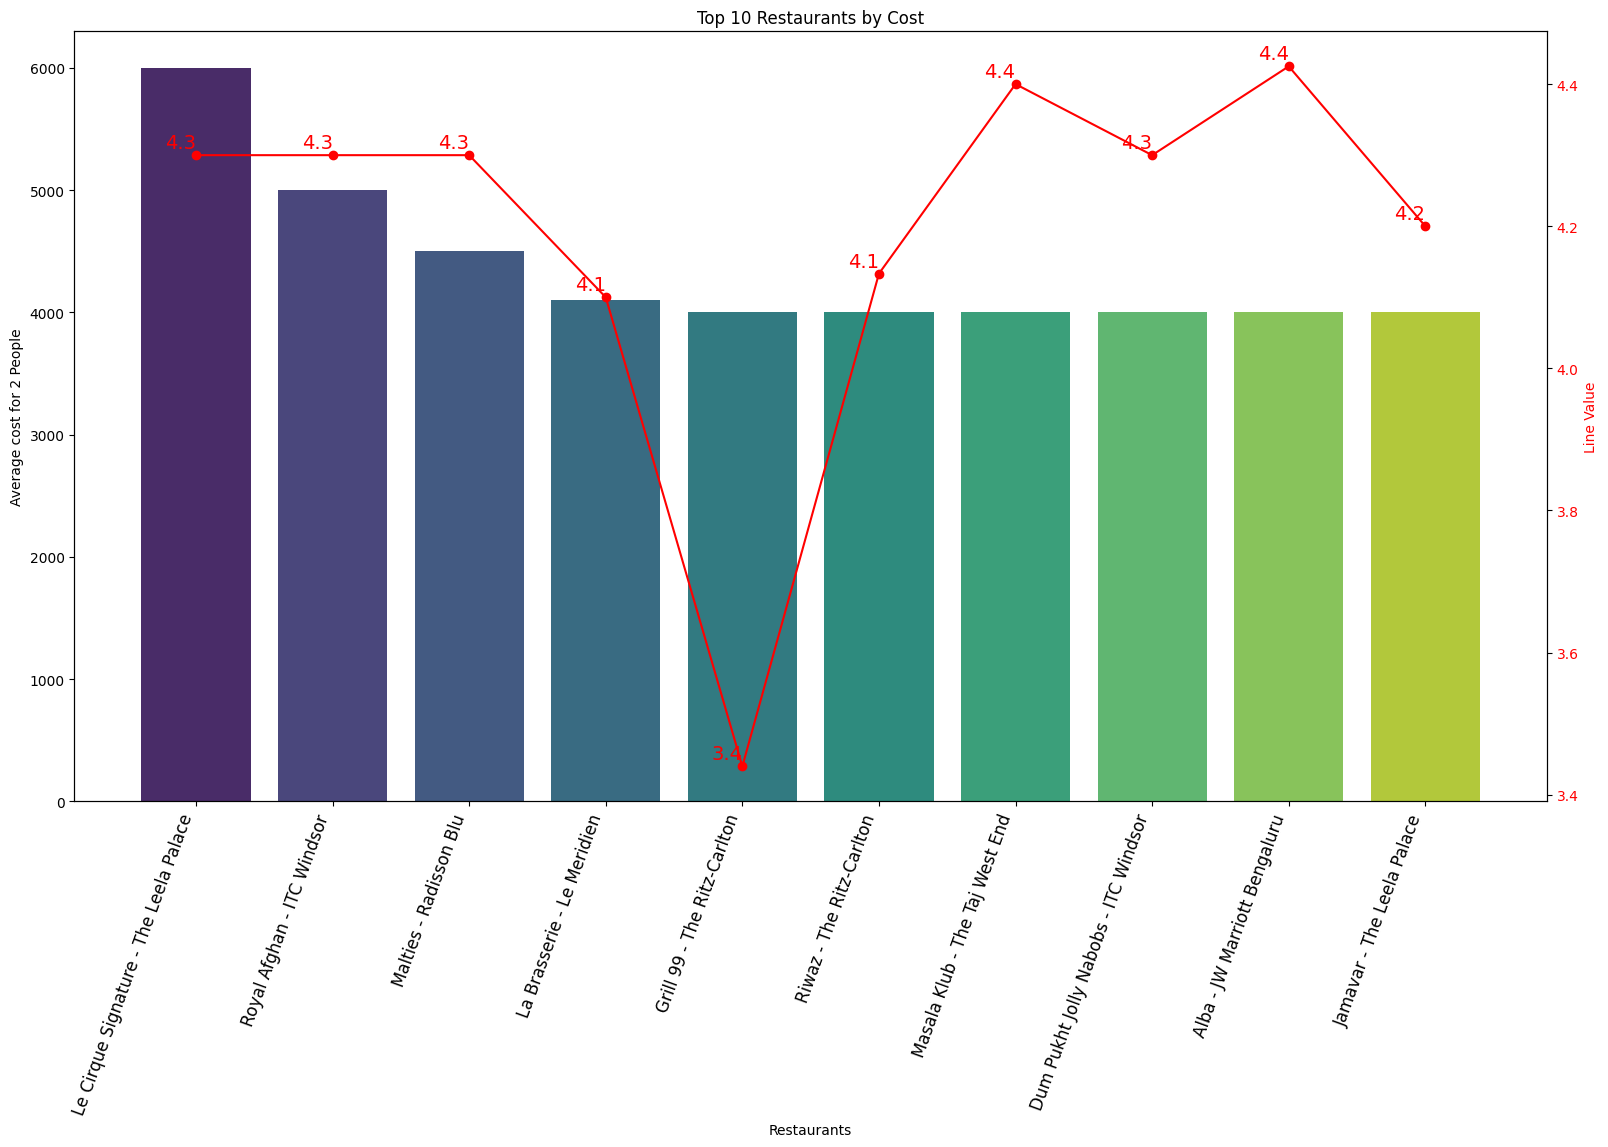

In [55]:
fig, ax = plt.subplots(figsize=(19,10))
ax = sns.barplot(x='name', y='approx_cost(for two people)', data=cost_of_rest, palette='viridis')
plt.ylabel('Average cost for 2 People')
plt.xlabel('Restaurants')
ax.set_xticklabels(cost_of_rest['name'], rotation=70, ha='right', fontsize=12)
plt.title('Top 10 Restaurants by Cost')

ax2 = ax.twinx()
ax2.plot(cost_of_rest['name'], cost_of_rest['rating'], color='red', marker='o', label='Line Data')

for i, value in enumerate(cost_of_rest['rating']):
    ax2.text(i, value + 0.01, f"{value:.1f}", ha= 'right', fontsize = 14, color = 'red' )

ax2.set_ylabel('Line Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

## No. of restaurants in a Location

In [56]:
df

,name,online_order,book_table,rating,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,0.0,0,Whitefield,Bar,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0.0,0,Whitefield,Bar,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,2500.0,Pubs and bars,Whitefield


In [57]:
no_of_rest = df.groupby('listed_in(city)')[['name']].value_counts().reset_index()

In [58]:
no_of_rest = no_of_rest.groupby('listed_in(city)')['count'].sum().sort_values(ascending=False).reset_index()

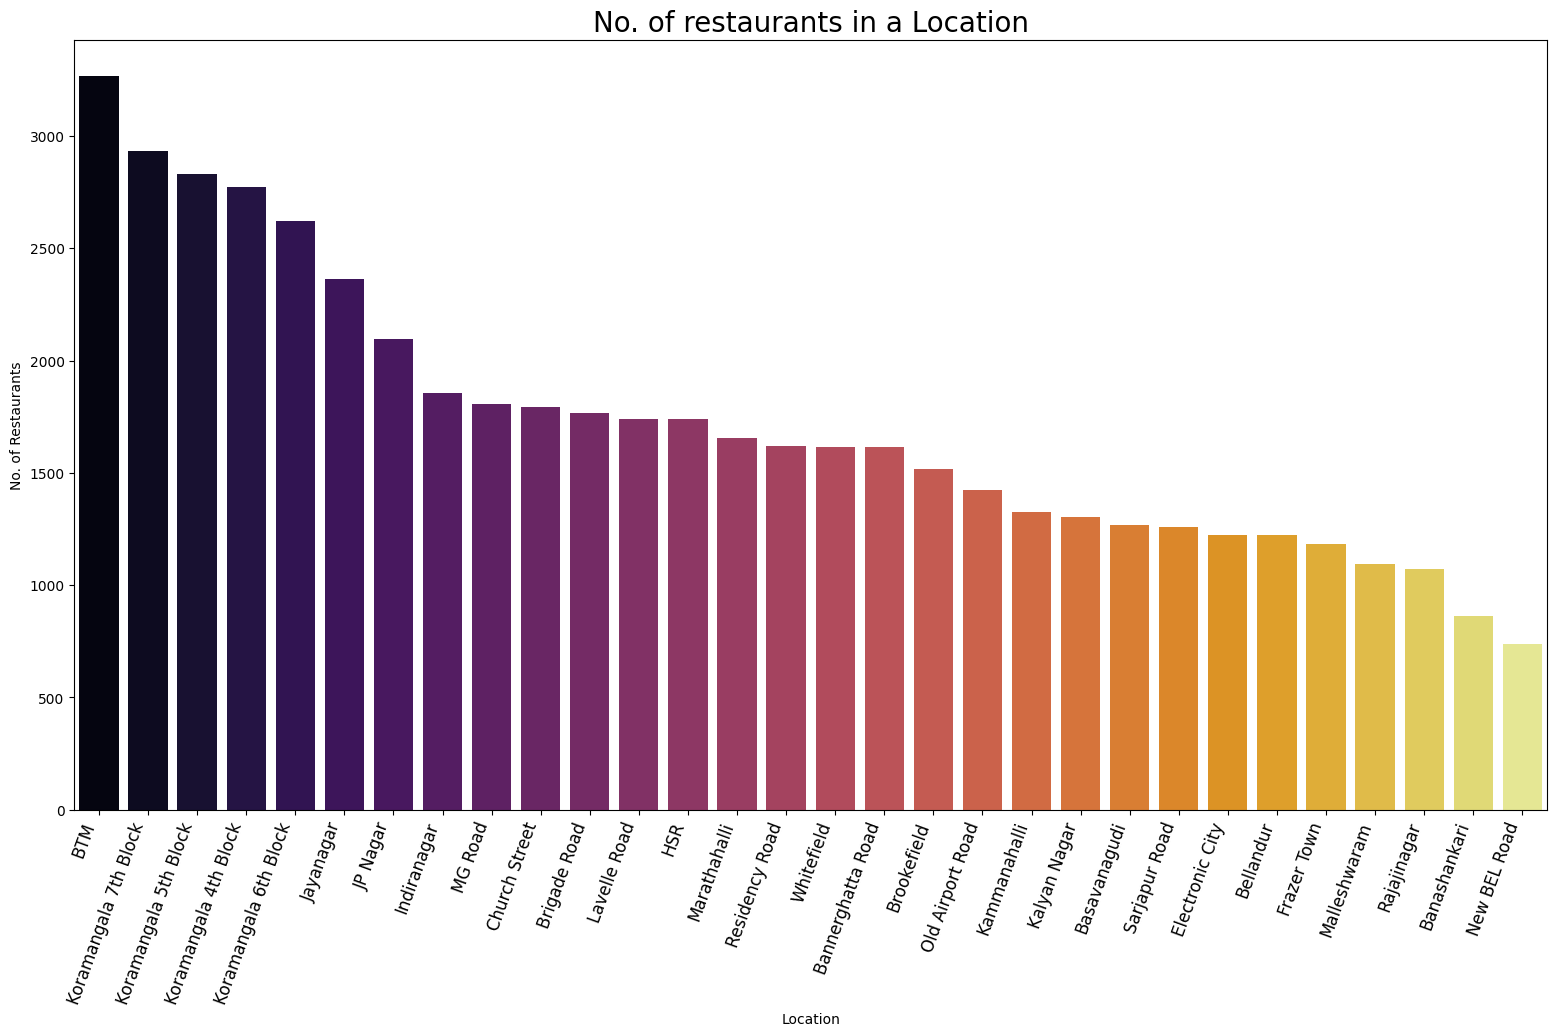

In [74]:
fig, ax = plt.subplots(figsize=(19,10))
ax = sns.barplot(x='listed_in(city)', y='count', data=no_of_rest, palette='inferno')
plt.ylabel('No. of Restaurants')
plt.xlabel('Location')
plt.title('No. of restaurants in a Location', fontsize=20)
ax.set_xticklabels(no_of_rest['listed_in(city)'], rotation=70, ha='right', fontsize=12)

plt.show()

# Most Famous Restaurant Chains


In [60]:
most_famous_chains = df.groupby('name').agg({'votes': 'sum','rating': 'median'}).sort_values('votes', ascending = False).reset_index()

In [61]:
most_famous_chains = df.groupby('name').agg({'votes': 'sum','rating': 'median'}).sort_values('votes', ascending = False).reset_index().head(10)

In [62]:
most_famous_chains

,name,votes,rating
0,Onesta,347520,4.4
1,Truffles,301059,4.6
2,Empire Restaurant,229808,4.0
3,Hammered,180602,4.7
4,The Black Pearl,172122,4.7
5,Meghana Foods,129557,4.4
6,Barbeque Nation,108425,4.5
7,Smally's Resto Cafe,102877,4.2
8,Byg Brewski Brewing Company,99531,4.9
9,Gilly's Restobar,98808,4.5


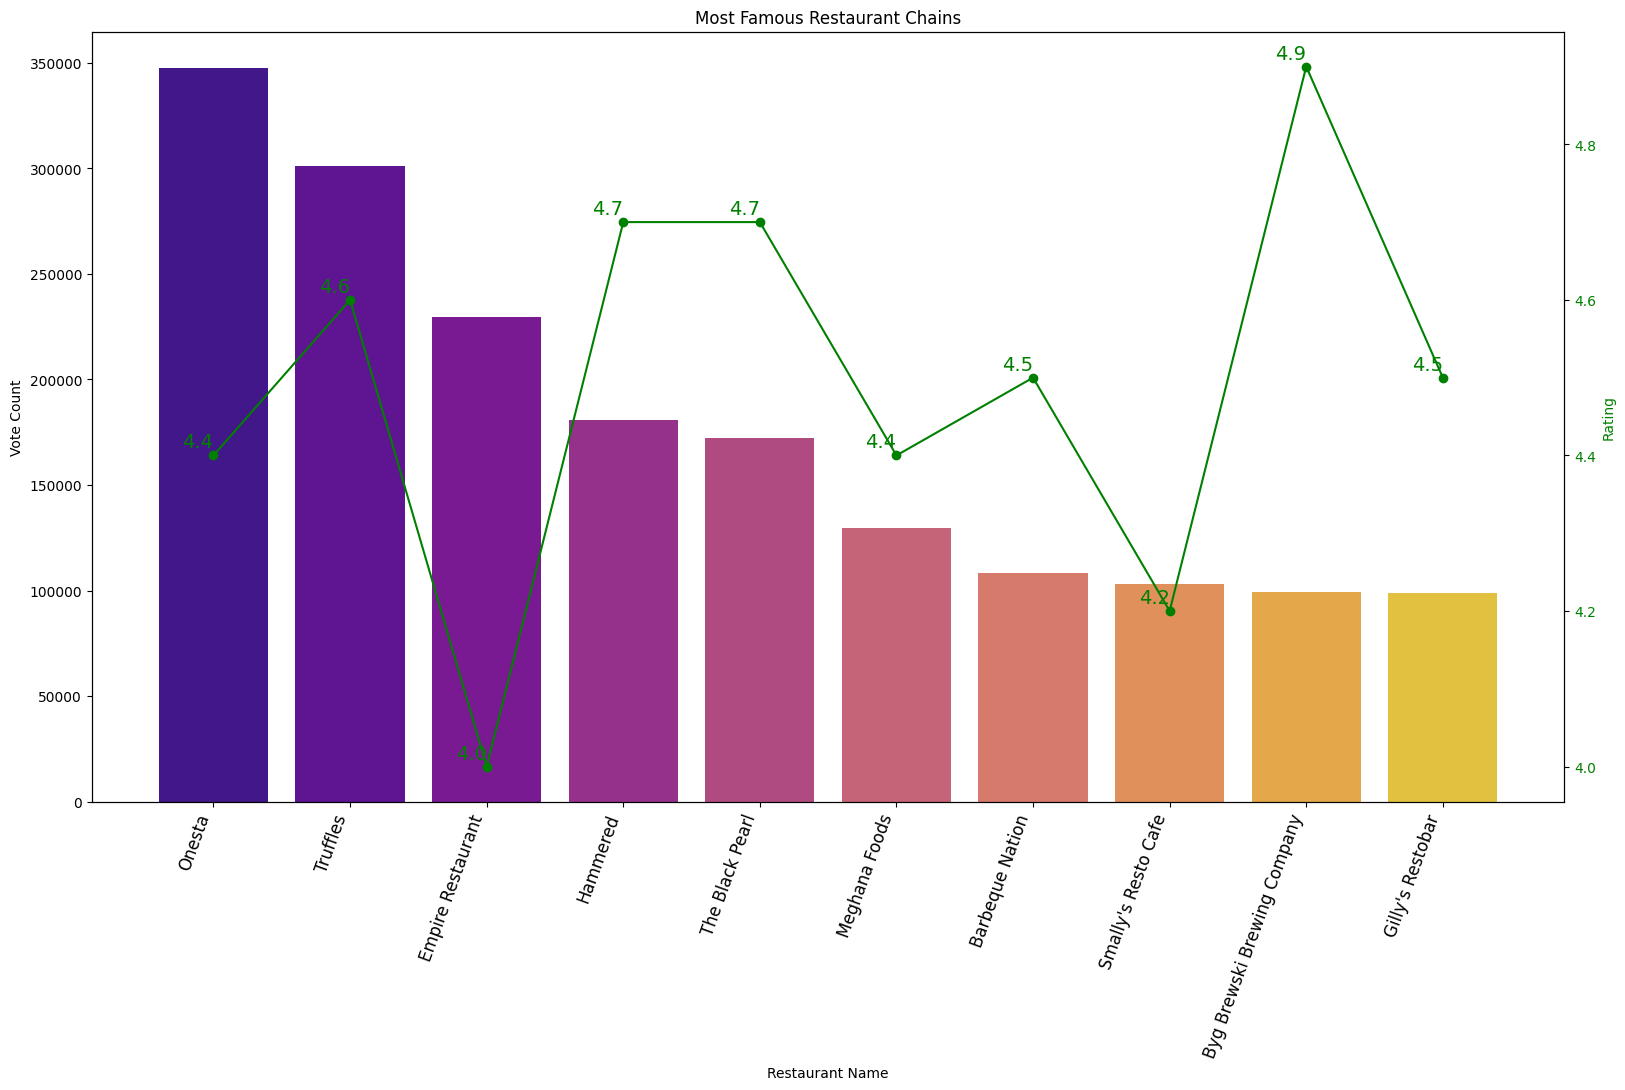

In [63]:
fig, ax = plt.subplots(figsize=(19,10))
ax = sns.barplot(x='name', y='votes', data=most_famous_chains, palette='plasma')
plt.ylabel('Vote Count')
plt.xlabel('Restaurant Name')
ax.set_xticklabels(most_famous_chains['name'], rotation=70, ha='right', fontsize=12)
plt.title('Most Famous Restaurant Chains')

ax2 = ax.twinx()
ax2.plot(most_famous_chains['name'], most_famous_chains['rating'], color='green', marker='o', label='Rating')

for i, value in enumerate(most_famous_chains['rating']):
    ax2.text(i, value + 0.01, f"{value:.1f}", ha= 'right', fontsize = 14, color = 'green' )

ax2.set_ylabel('Rating', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()